# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
# Your work here.
df.head()

temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0

In [5]:
df.describe()

temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000

## 1. Is the distribution of body temperatures normal?

#### Visualize:

/Users/floriansestak/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


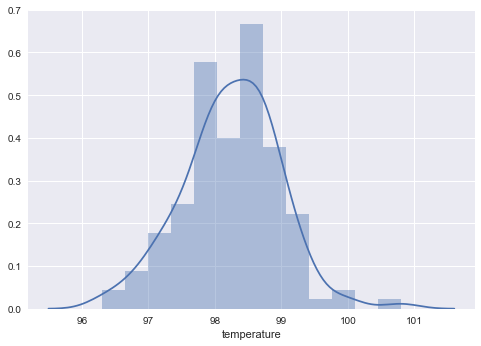

In [6]:
sns.distplot(df.temperature)

On the plot we can see that the temperature looks normal distributed.

#### Calculate:

In [7]:
sts.mstats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

P-Value = 25,87%<br>
Assumed Significance-Level = 5 %<br>
25,87 % > 5 % => there is a high probability that the data is normal distributed.

## 2. Is the sample size large? Are the observations independent?

### 2.1 Is the sample size large?

In [8]:
# Calculate sample size.
n = len(df)
n

130

Assuming that a large sample size is > 30,<br>
n=130 > 30 => large sample size

### 2.2 Are the observations independent?

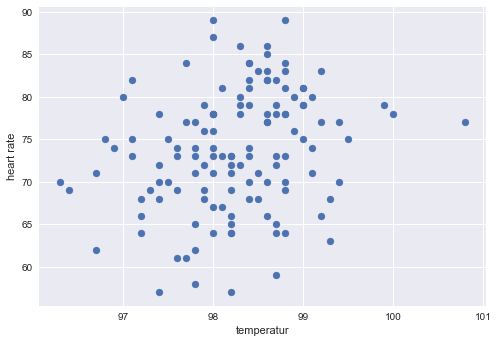

In [9]:
# Plot observations
plt.xlabel("temperatur")
plt.ylabel("heart rate")
plt.scatter(df.temperature, df.heart_rate)

On the scatterplot it doen't look like that there is a big correlation between <br>
the "Body Temperature" and the "Heart Rate", but you can see that the "Temperature" values <br>
between 98 - 99 have higher "Heart Rates", but that is no proof that the values are dependent.

In [10]:
# Calculate correlation coefficient
np.corrcoef(df.temperature, df.heart_rate)

array([[ 1.       ,  0.2536564],
       [ 0.2536564,  1.       ]])

The correlation coefficient of 0.25 shows that there is a small positive correlation between, <br>
the "Body Temperature" and the "Heart Rate". 

## 3. Is the true population mean really 98.6 degrees F?

### 3.1 Would you use a one-sample or two-sample test? Why?

<b>One-sampled test</b> because, of comparing with a given mean and not with an other sample.

### 3.2 In this situation, is it appropriate to use the $t$ or $z$ statistic?

In for this sample it is recommended to use $z$ statistics, because the sample size <b>n=130 > 30</b>.<br>
The standard deviation is not given, but because n > 30 <br>
it can be approximated by the standard normal distribution.<br>

In [13]:
# H0: mean  = 98.6 
# H1: mean != 98.6
# a = 0.05

u0 = 98.6
X = df.temperature.mean()
sigma = df.temperature.std()

u = ((X - u0) / (sigma / n**0.5))
u

-5.454823292364079

<I>Z - Statistics:

In [12]:
# Get critical c value for the 0.95 confidence interval
c = sts.norm.ppf(0.975)
c

1.959963984540054

Interval is -1.96 =< 0 =< 1.96 in standard normal distribution<br>
-5.455 < -1.96 <br>
=> reject H0

### 3.3 Now try using the other test. How is the result be different? Why?

<I>T - Statistics:

In [232]:
# Get c value for the 0.95 confidence interval.
c = sts.t.ppf(0.975, n -1)
c

1.9785244914586051

=> Also with t-statistics H0 should be rejected

The reason why the c-value differs is because we calculate the student distribution, and not <br>
the standard normal distribution like in z-statistics.

## 4. At what temperature should we consider someone's temperature to be "abnormal"?


### 4.1 Start by computing the margin of error and confidence interval.

In [236]:
# Calculate critical value
c = sts.norm.ppf(0.975)

# transform back to normal distribution
c_n = c * (sigma / n**0.5)
ci_max = round(u0 + c_n, 3)
ci_min = round(u0 - c_n, 3)
print("The margin of error is:")
print(c)
print("The confidence interval is between: ")
print(ci_min, ci_max)

The margin of error is:
1.95996398454
The confidence interval is between: 
(98.474, 98.726)


A temperature <b>lower than 98.474 F°</b> or <b>higher than 98.726</b> could be interpreted as abnormal

## 5. Is there a significant difference between males and females in normal temperature?

### 5.1 What test did you use and why?

In [293]:
# temperatures of men and woman
df_men = df[df.gender == "M"]["temperature"]
df_woman = df[df.gender == "F"]["temperature"]

The samples of men and woman are independent, so we are using a <b>two-sided test for independent samples<b>.<br>


In [301]:
# normal temperature men woman
x_ = df_men.mean()
y_ = df_woman.mean()

In [295]:
# H0: u1 = u2
# H1: u1 != u2
# a = 0.05
# n > 30 => use the estimate std as std
sigma = (df_men.var() / len(df_men) + df_woman.var() / len(df_woman))**0.5

In [296]:
u = (x_ - y_) / sigma
u

-2.285434538165274

In [297]:
# Get critical c value for the 0.95 confidence interval
c = sts.norm.ppf(0.975)
c

1.959963984540054

Interval is -1.96 =< 0 =< 1.96 in standard normal distribution<br>
-2.2854 < -1.96<br>
=> reject H0

### 5.2 Write a story with your conclusion in the context of the original problem.

There is a probability of 95% that men and woman have a different normal temperature. So there is a high probability that the normal temperature of men is lower than the normal temperature of woman.